# TITANIC CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
warnings.filterwarnings("ignore")

## Data Preprocessing

In [3]:
Train_data = pd.read_csv(r"C:\Users\USER\Documents\archive (1)\train.csv")
Train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
Train_data = Train_data.drop(["Name", "Ticket", "Fare", "Cabin", "Embarked"],axis=1)
Train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,NaN,1,2
889,890,1,1,male,26.0,0,0


In [5]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 48.9+ KB


In [6]:
Train_data['Sex'] = Train_data['Sex'].map({'male': 0, 'female': 1})
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [7]:
Train_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


In [8]:
Train_data.duplicated().sum()

0

In [9]:
Train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
dtype: int64

In [10]:
Avg_age = Train_data.groupby(['Sex', 'Pclass'])['Age'].mean().reset_index()
Avg_age

,Sex,Pclass,Age
0,0,1,41.281386
1,0,2,30.740707
2,0,3,26.507589
3,1,1,34.611765
4,1,2,28.722973
5,1,3,21.750000


In [11]:
Avg_age = Train_data.groupby(['Sex', 'Pclass'])['Age'].mean().to_dict()
Avg_age

{(0, 1): 41.28138613861386,
 (0, 2): 30.74070707070707,
 (0, 3): 26.507588932806325,
 (1, 1): 34.61176470588235,
 (1, 2): 28.722972972972972,
 (1, 3): 21.75}

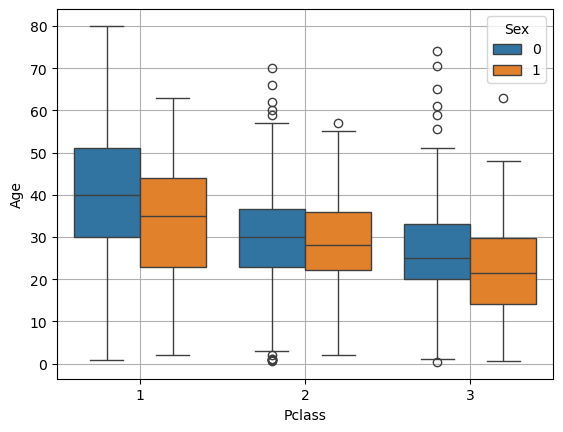

In [12]:
sns.boxplot(x = 'Pclass', y = 'Age', hue='Sex', data=Train_data)
plt.grid(True)

In [13]:
def impute_age(cols):
    if np.isnan(cols['Age']):
        key = (cols['Sex'], cols['Pclass'])
        if key in Avg_age:
            return Avg_age[key]
        else:
            return np.nan
    else:
            return cols['Age']

In [14]:
Train_data['Age']= Train_data.apply(impute_age,axis=1)

In [15]:
Train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [16]:
Train_data['Age'] = Train_data['Age'].astype('int64')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int64
 5   SibSp        891 non-null    int64
 6   Parch        891 non-null    int64
dtypes: int64(7)
memory usage: 48.9 KB


In [17]:
Train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             71
SibSp            7
Parch            7
dtype: int64

In [18]:
Train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [19]:
Train_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [20]:
Train_data['Age'].unique()

array([22, 38, 26, 35, 54,  2, 27, 14,  4, 58, 20, 39, 55, 30, 31, 21, 34,
       15, 28,  8, 19, 40, 66, 42, 18,  3,  7, 49, 29, 65, 41,  5, 11, 45,
       17, 32, 16, 25,  0, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36,
       51, 44,  1, 61, 56, 50, 62, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74], dtype=int64)

In [21]:
Train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22,1,0
1,2,1,1,1,38,1,0
2,3,1,3,1,26,0,0
3,4,1,1,1,35,1,0
4,5,0,3,0,35,0,0
...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0
887,888,1,1,1,19,0,0
888,889,0,3,1,21,1,2
889,890,1,1,0,26,0,0


## Data Visualization

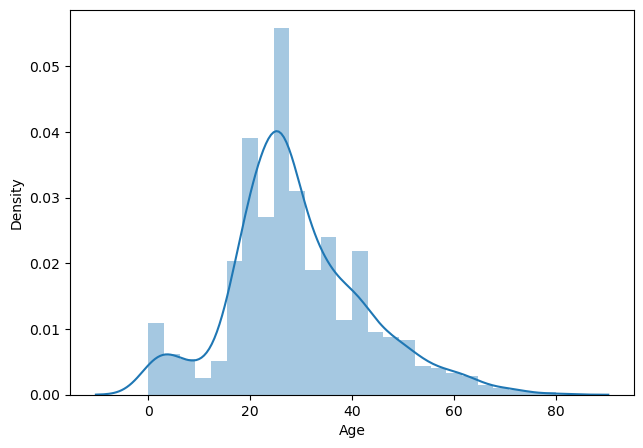

In [22]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(Train_data['Age'])

plt.show()

<Axes: ylabel='Age'>

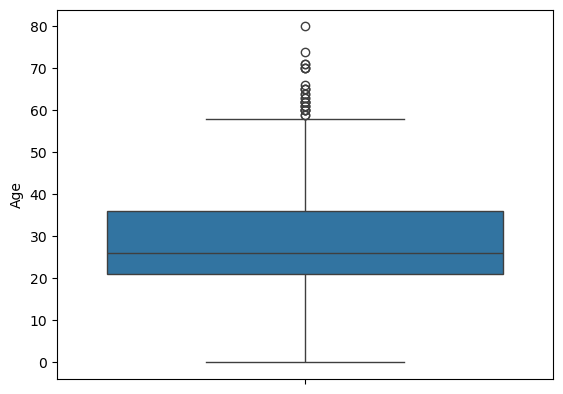

In [23]:
sns.boxplot(Train_data['Age'])

In [24]:
Train_data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.040263,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.066538,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.410104,0.083081,0.018443
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.112869,0.114631,0.245489
Age,0.040263,-0.066538,-0.410104,-0.112869,1.000000,-0.251439,-0.178855
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.251439,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,0.245489,-0.178855,0.414838,1.000000


In [25]:
Sur1 = Train_data['Survived']
Sur2 = Train_data['Pclass']

In [26]:
Sur1_2 = pd.crosstab(Sur1, Sur2)
Sur1_2

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [27]:
# We can infer that:
# Those in Class 1 has the highest survival rate  
# Those in Class 2 has a 50% chance of survival
# Those in Class 1 has the least chance of survival

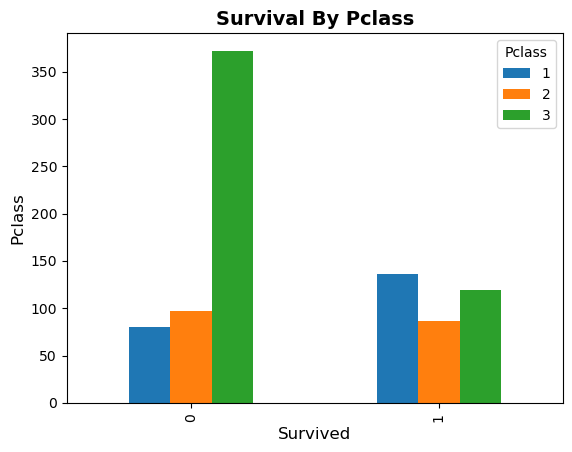

In [28]:
Sur1_2.plot(kind = 'bar')
plt.title('Survival By Pclass', fontweight = 'bold', fontsize = 14)
plt.xlabel('Survived', fontsize = 12)
plt.ylabel('Pclass', fontsize = 12)
plt.show()

In [29]:
Sur3 = Train_data['Sex']
Sur1_3 = pd.crosstab(Sur1, Sur3)
Sur1_3

Sex,0,1
Survived,,
0,468,81
1,109,233


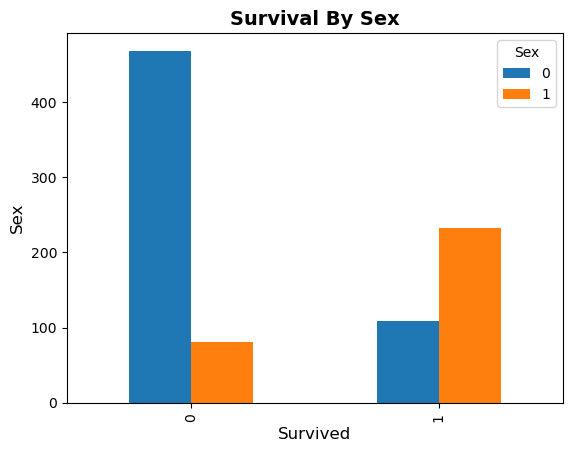

In [30]:
Sur1_3.plot(kind = 'bar')
plt.title('Survival By Sex', fontweight = 'bold', fontsize = 14)
plt.xlabel('Survived', fontsize = 12)
plt.ylabel('Sex', fontsize = 12)
plt.show()

In [31]:
# We can infer that
# Men has the least survival rate compared to women

In [32]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

Train_data['Age_group'] = pd.cut(Train_data['Age'], bins=bins, labels = labels, right = False)
Train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Age_group
0,1,0,3,0,22,1,0,21-30
1,2,1,1,1,38,1,0,31-40
2,3,1,3,1,26,0,0,21-30
3,4,1,1,1,35,1,0,31-40
4,5,0,3,0,35,0,0,31-40
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,21-30
887,888,1,1,1,19,0,0,11-20
888,889,0,3,1,21,1,2,21-30
889,890,1,1,0,26,0,0,21-30


In [33]:
Sur4 = Train_data['Age_group']
Sur1_4 = pd.crosstab(Sur1, Sur4)
Sur1_4

Age_group,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80
Survived,,,,,,,,
0,24,61,245,101,71,28,13,6
1,38,41,113,84,39,20,6,0


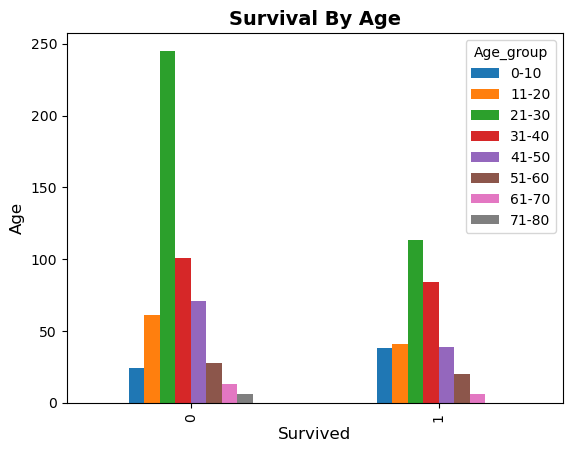

In [34]:
Sur1_4.plot(kind = 'bar')
plt.title('Survival By Age', fontweight = 'bold', fontsize = 14)
plt.xlabel('Survived', fontsize = 12)
plt.ylabel('Age', fontsize = 12)
plt.show()

In [35]:
# We can infer that:
# Those within the range of 0-10 survived more than they died
# While the others had a significant amount of deaths than survival, 
# those within the range of 21-30 still had the highest chance of survival, 
# closely followed by those within the range of 31-40.

In [36]:
Sur5 = Train_data['SibSp']
Sur1_5 = pd.crosstab(Sur1, Sur5)
Sur1_5

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


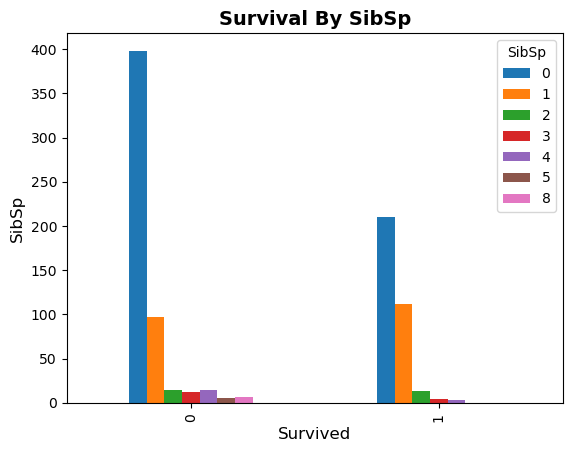

In [37]:
Sur1_5.plot(kind = 'bar')
plt.title('Survival By SibSp', fontweight = 'bold', fontsize = 14)
plt.xlabel('Survived', fontsize = 12)
plt.ylabel('SibSp', fontsize = 12)
plt.show()

In [38]:
Sur6 = Train_data['Parch']
Sur1_6 = pd.crosstab(Sur1, Sur6)
Sur1_6

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


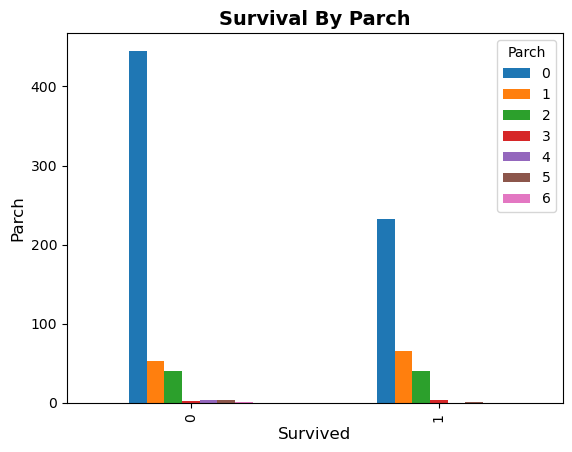

In [39]:
Sur1_6.plot(kind = 'bar')
plt.title('Survival By Parch', fontweight = 'bold', fontsize = 14)
plt.xlabel('Survived', fontsize = 12)
plt.ylabel('Parch', fontsize = 12)
plt.show()

In [40]:
Sur2_3 = pd.crosstab(Sur2, Sur3)
Sur2_3

Sex,0,1
Pclass,,
1,122,94
2,108,76
3,347,144


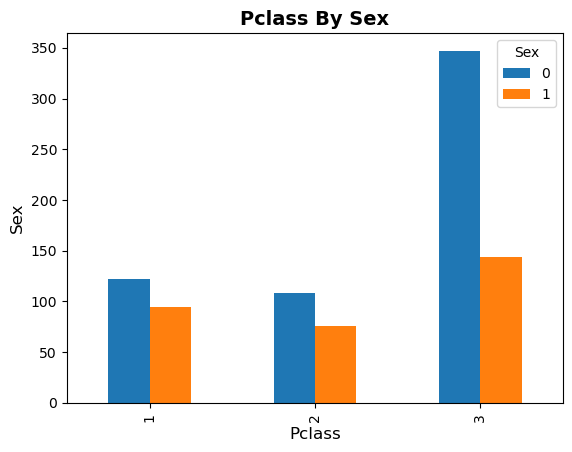

In [41]:
Sur2_3.plot(kind = 'bar')
plt.title('Pclass By Sex', fontweight = 'bold', fontsize = 14)
plt.xlabel('Pclass', fontsize = 12)
plt.ylabel('Sex', fontsize = 12)
plt.show()

In [42]:
Avg_age1 = Train_data.groupby(['Sex', 'Survived'])['Age'].mean().reset_index()
Avg_age1

,Sex,Survived,Age
0,0,0,30.878205
1,0,1,27.816514
2,1,0,24.185185
3,1,1,28.188841


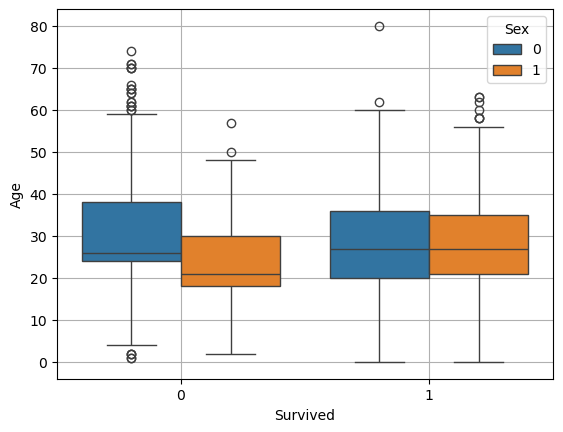

In [43]:
sns.boxplot(x = 'Survived', y = 'Age', hue='Sex', data=Train_data)
plt.grid(True)

In [44]:
# The boxplot above shows that just two men above 60 survived 

## Data Modelling

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Dropping the Parch Column improved our model

Train_data = Train_data.drop(["Age_group","Parch"],axis=1)
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int64
 5   SibSp        891 non-null    int64
dtypes: int64(6)
memory usage: 41.9 KB


In [47]:
y = Train_data["Survived"]
X =  Train_data.drop(["Survived"],axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =10)

scale = StandardScaler()
X_train_sc = scale.fit_transform(X_train)
X_test_sc = scale.fit_transform(X_test)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state = 1)
model.fit(X_train_sc,y_train)
print(model.score(X_test_sc,y_test)*100)

86.03351955307262


In [48]:
titanic = pd.DataFrame(Train_data)
titanic.to_csv('my_titanic.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# SUMMARY

**From our model, we were able to discover the following:**
- The sex of the passengers was very crucial in their survival.
  Women had a higher chance of Survival than the men.
- Passengers within the age range of 21-30 had a higher chance of survival.
- Passengers in Class 1 had a higher chance of survival compared to those in Class 2&3.
  Though more of those in Class 3 survived compared to those in Class 2, the amount of death in the former is far greater than the latter.
  Therefore, it is advisable for passenger to board in Class 2 than Class 3 due to the average amount of survival and death in the former.
- Passengers with zero Sibling/Spouse had the highest survival rate compared to those who had.
- Passengers with zero Parent/Child had the highest survival rate compared to those who had.

### _In Conclusion, For a passenger to have a very high survival rate, the passenger must be a woman, be within the range of 21-30, have zero SibSp/Parch and must be in Class 1._